# 手寫數字辨識程式研究 by Xuan

使用資料集：MNIST

## Step 1 引入套件

這些是需要引入的套件，你可以透過以下的指令來載這些東西。

In [21]:
! pip install opencv-python
! pip install matplotlib
! pip install numpy
! pip install sklearn

載入完之後，匯入這些套件

In [22]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

## Step 2 讀入必要檔案

接著我們會需要讀入必要的檔案，分別是 label 與 image

image 的部分會從影片中擷取圖檔

label 的部分則是影片中數字按照順序出現的文字檔。

### 讀入 label

很簡單，只需要 loadtext 即可。

In [23]:
labels = np.uint8(np.loadtxt("label.txt"))

### 讀入 image

我們需要從影片中讀入，所以我們會需要用到 `cv2.VideoCapture` 的東西。

接著我們會一幀一幀讀入，直到 `success = False` 時停止，代表沒有幀可讀入了。

In [24]:
# 讀入 test_dataset.avi
vidcap = cv2.VideoCapture("test_dataset.avi")

success = True

# 存放幀的 list
video_frame = []

while success:
    # 讀入幀
    success, image = vidcap.read()

    # 確認還有沒有幀
    if not success:
        break

    # 將影像由 RGB 轉成 GRAY（這樣只會保留明亮度，所以陣列只有二維，RGB 會出現三維不好處理）
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # 加到 list 裡面
    video_frame.append(image)

## Step 3 轉換資料

在 `scikit-learn` 中，我們在把圖入讀進去模型，給模型做使用時，

需要將圖片從多張二維的 `(28, 28)` 轉成 `(圖片張數, -1)`，因此我們用 `numpy` 來做轉換。 

In [25]:
data = np.array(video_frame).reshape((len(video_frame), -1))

我們可以簡單的把資料以及預期結果呈現出來。

除此之外，我將它存成了圖片，以利於使用一些不支援 `matplotlib` `imshow` 的 `IDE` 可以看到。

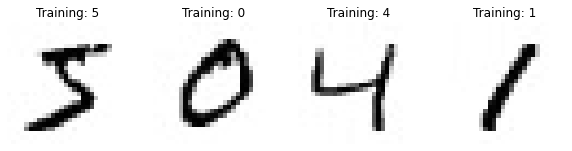

In [26]:
# 創建一個 plot 來放我們的預期圖片
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))

# 開始遍歷 plot, data, label
for ax, image, label in zip(axes, data, labels):

    # 關閉 x 軸線（不需要 x 軸線）
    ax.set_axis_off()

    # 將圖片從剛剛轉換的資料，轉回來二維的圖片
    image = image.reshape(28, 28)

    # 顯示圖片
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")

    # 設定標題
    ax.set_title("Training: %i" % label)
    
    # 存圖片
    ax.get_figure().savefig("output1.png")

# Step 4 使用預測器

在這邊，我們使用 `K-neighbor classifier` 分類器來進行分類。

接著就能使用 `train_test_split` 來將資料集分割成訓練資料集與測試資料集。

再使用 `fit` 來進行訓練，使用 `predict` 來進行預測。

In [31]:
# 創建一個 K-neighbor classifier 分類器
clf = KNeighborsClassifier()

# 將資料及分割成 1% 的測試資料與 99% 的訓練資料
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.5)

# 訓練
clf.fit(x_train, y_train)

# 預測
predicted = clf.predict(x_test)

接下來我們可以把預測結果利用 `matplotlib` 來呈現結果。

我將它存成了圖片，以利於使用一些不支援 `matplotlib` `imshow` 的 `IDE` 可以看到。

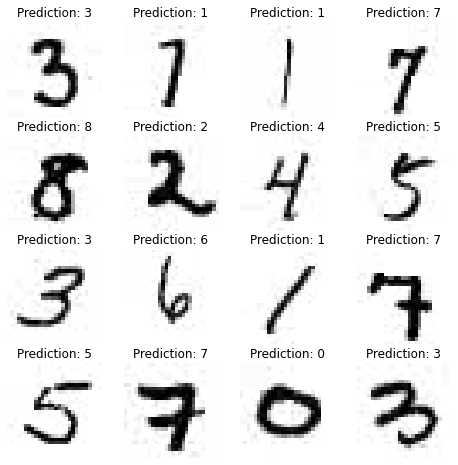

In [32]:
# 用來遍歷我們的預測資料
index = 0

# 創建一個 plot
_, axes = plt.subplots(nrows=4, ncols=4, figsize=(8, 8))

# 因為有四格，所以先從欄開始
for axs in axes:
    
    # 再從列開始
    for ax in axs:

        # 不需要 x 軸
        ax.set_axis_off()

        # 把圖片轉回去 (28, 28) 的形式
        sk_image = x_test[index].reshape(28, 28)

        # 讀入預測結果
        prediction = predicted[index]

        # 顯示圖片
        ax.imshow(sk_image, cmap=plt.cm.gray_r, interpolation="nearest")
        
        # 設置標題
        ax.set_title(f"Prediction: {prediction}")
        
        # 存成檔案
        ax.get_figure().savefig("output2.png")

        # 繼續遍歷，所以 index += 1
        index += 1

## Step 5 印出結果

我們可以用 `metrics.classification_report` 來印出我們的結果。

In [33]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier KNeighborsClassifier():
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2932
           1       0.95      0.99      0.97      3371
           2       0.98      0.95      0.96      2918
           3       0.96      0.96      0.96      3106
           4       0.97      0.96      0.97      2954
           5       0.96      0.96      0.96      2731
           6       0.98      0.99      0.98      2941
           7       0.96      0.97      0.96      3165
           8       0.99      0.92      0.95      2953
           9       0.94      0.96      0.95      2929

    accuracy                           0.97     30000
   macro avg       0.97      0.96      0.97     30000
weighted avg       0.97      0.97      0.97     30000




另一種結果是 `Confusion matrix`，可以知道有幾個圖片被誤判了。

可以使用 `metrics.ConfusionMatrixDisplay.from_predictions`，

來列出這個 `Confusion matrix`。

Confusion matrix:
[[2917    3    1    1    0    3    5    2    0    0]
 [   1 3349    7    1    2    0    0    8    1    2]
 [  25   36 2773   10    6    4    6   48    6    4]
 [   6   10   17 2988    1   32    4   21   15   12]
 [   2   32    2    0 2831    0   11    8    0   68]
 [  10    7    1   41    6 2612   31    2    8   13]
 [  10    7    0    0    4    7 2913    0    0    0]
 [   1   35    8    1   11    1    0 3070    1   37]
 [   9   45   18   43   23   49   13   11 2705   37]
 [   9    6    3   30   23    5    0   44    7 2802]]


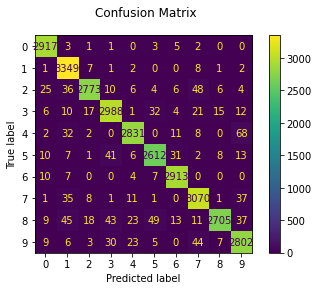

<Figure size 432x288 with 0 Axes>

In [34]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)

# 設置標題
disp.figure_.suptitle("Confusion Matrix")

# 顯示出文字版的 confusion matrix
print(f"Confusion matrix:\n{disp.confusion_matrix}")

# 顯示出圖片版的 confusion matrix
plt.show()

# 存成圖片
plt.savefig("output3.png")